In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [11]:
test_path="/exdata/data/vggface2/test_id_sample.csv"
maad_path="/exdata/data/vggface2/maad_id.csv"
test_pre_path="/home/lsf/桌面/lijia/face-recognition/data/test_pre_id.csv"


In [12]:
test_pre_file=pd.read_csv(test_pre_path)
test_file=pd.read_csv(test_path)
maad_file=pd.read_csv(maad_path).drop(["id"],axis=1)

In [13]:
resultfile=test_file.merge(test_pre_file,on="Filename")

In [16]:
resultfile["acc"]=resultfile["pre_id"]==resultfile["id"]

In [18]:
maad_file=maad_file.merge(resultfile,on="Filename")
maad_file

,Filename,Male,Female,Young,Middle_Aged,Senior,Asian,White,Black,Rosy_Cheeks,...,Wearing_Hat,Wearing_Earrings,Wearing_Necktie,Wearing_Lipstick,No_Eyewear,Eyeglasses,Attractive,id,pre_id,acc
0,n000002/0004_01.jpg,0,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,True
1,n000002/0012_01.jpg,0,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,True
2,n000002/0015_01.jpg,0,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,True
3,n000002/0020_01.jpg,0,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,True
4,n000002/0024_01.jpg,0,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626471,n009279/0469_04.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8630,8630,True
626472,n009279/0475_01.jpg,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,8630,8496,False
626473,n009279/0503_01.jpg,0,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,8630,8630,True
626474,n009279/0561_01.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8630,8630,True


In [19]:
feature_groups = {'Gender': ['Male'],
    'Age':['Young', 'Middle_Aged', 'Senior'],
    'Race':['Asian','White','Black'],
    'Rosy_Cheeks': ['Rosy_Cheeks'],
    'Shiny_Skin': ['Shiny_Skin'],
    'Bangs':['Bangs'],
    'Sideburns':['Sideburns'],
    'HairColor': ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair'],
    'Beard': ['No_Beard','Mustache','5_o_Clock_Shadow','Goatee'],
    'FaceShape': ['Oval_Face', 'Square_Face', 'Round_Face'],
    'Double_Chin': ['Double_Chin'],
    'High_Cheekbones': ['High_Cheekbones'],
    'Chubby': ['Chubby'],
    'Forehead_visible': ['Obstructed_Forehead','Fully_Visible_Forehead'],
    'Brown_Eyes':['Brown_Eyes'],
    'Bags_Under_Eyes':['Bags_Under_Eyes'],
    'Bushy_Eyebrows':['Bushy_Eyebrows'],
    'Arched_Eyebrows':['Arched_Eyebrows'],
    'Mouth_Closed':['Mouth_Closed'],
    'Smiling':['Smiling'],
    'Big_Lips':['Big_Lips'],
    'NoseType': ['Big_Nose','Pointy_Nose'],
    'Heavy_Makeup': ['Heavy_Makeup'],
    'Eyeglasses': ['Eyeglasses'],
    'Wearing_Lipstick': ['Wearing_Lipstick'],
    'Attractive': ['Attractive']}

# paint a graph
input: attributes name, attributes list, score dict, a signal to save graph
output: no return

In [102]:
def paint_graph(attr_name,attr_list,score_dict,is_save=False):
    plt.figure(figsize=(10, 10))
    font = {
            'weight': 'normal',
            'size': 20
        }
    plt.xlabel(type, font)
        # if type=="multi":
        #     xlabel=self.group_attr.keys()
        # else:
        #     xlabel=self.target_attributions
    print(["no_"+attr_name,attr_name])
    if(len(attr_list)==1):
        plt.bar(["no_"+attr_name,attr_name],score_dict.values(),linewidth=2)
    else:
        plt.bar(attr_list,score_dict.values(),linewidth=2)
    plt.ylim([min(list(score_dict.values()))-0.02,1])
    plt.title(attr_name)
    plt.yticks(size=25)
    plt.xticks(size=15)
    if is_save:
        plt.savefig(attr_name+".png")
    plt.show()

# define a function:
input: attributes name, maadfile,group dict
output: a graph whose x-dim is attributes name and y-dim is accuracy

{0: 0.9716171539778189, 1: 0.9751310101408055}
['no_Gender', 'Gender']


/tmp/ipykernel_4664/2949964898.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ida,gp in enumerate(attr_group):


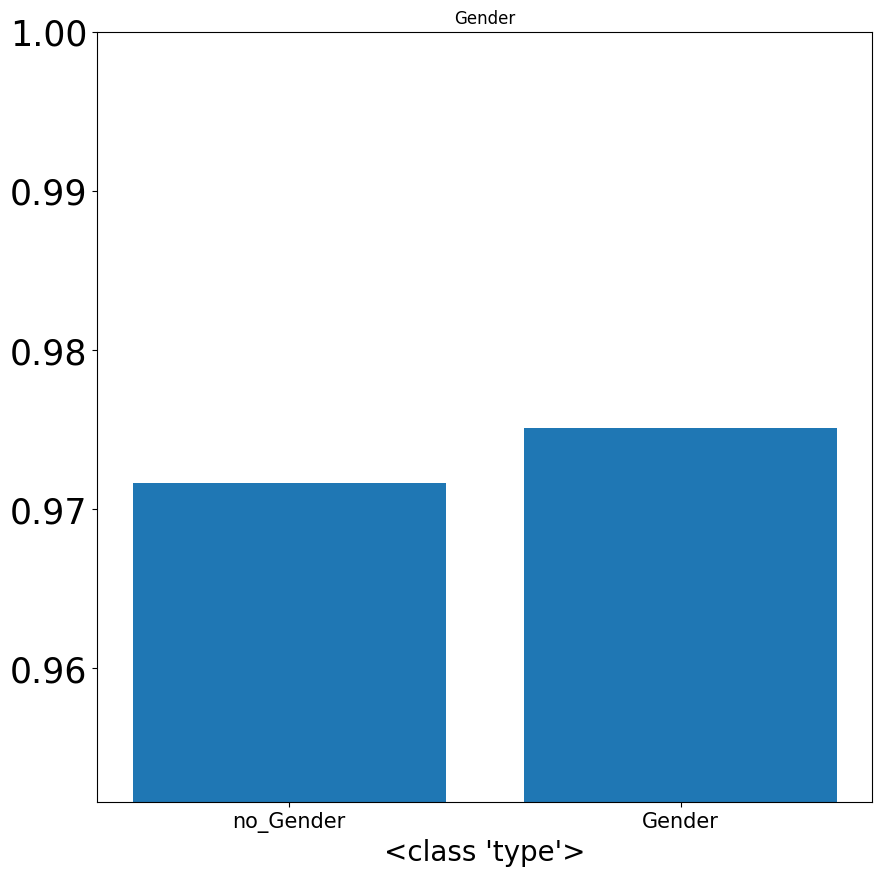

{0: 0.9725105365792288, 1: 0.9797308398930529, 2: 0.976267840250072}
['no_Age', 'Age']


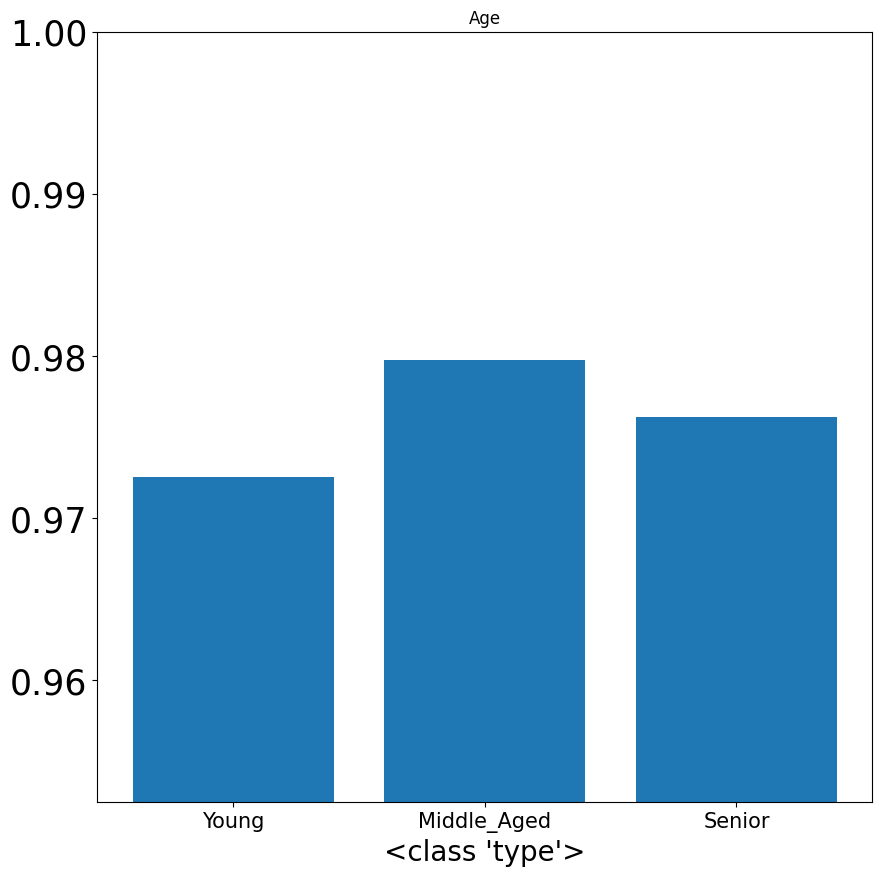

In [103]:
def get_fairness_result(attr_name,maadfile,group_dict):
    attr_names=group_dict[attr_name]
    score_dict={}

    if(len(attr_names)==1):
        attr_group=maad_file[attr_names+["acc"]].groupby(attr_names)
        print(attr_group)
        for ida,gp in enumerate(attr_group):
            score_dict[ida]=gp[1]["acc"].sum()/gp[1]["acc"].count()
        
    else:
        for id_attr,attr in enumerate(attr_names):
            select_attr_maadfile=maad_file[[attr,"acc"]]
            select_attr_maadfile=select_attr_maadfile[select_attr_maadfile[attr]==1]
            score_dict[id_attr]=select_attr_maadfile["acc"].sum()/select_attr_maadfile.shape[0]
    print(score_dict)
    paint_graph(attr_name,attr_names,score_dict)

get_fairness_result("Gender",maad_file,feature_groups)
get_fairness_result("Age",maad_file,feature_groups)
        